<a href="https://colab.research.google.com/github/plnu-biomechanics/kin6015/blob/main/notebooks/kin6015_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.pointloma.edu/sites/default/files/styles/basic_page/public/images/PLNU_Biomechanics_Lab_green_yellowSD_HiRes.png" width=400>

## **KIN 6015 Biomechanical Basis of Human Movement**
Instructor: Arnel Aguinaldo, PhD

**Lab 2 Data Processing**

In this lab, gait analysis data was collected with and without shoes. Inverse kinematics (IK) and kinetics via inverse dynamics were estimated using Visual3D. The data were then exported as text (*.txt) files and uploaded to the class repository in the lab's [GitHub](https://github.com/plnu-biomechanics).

To further process the data for this lab, follow the steps in this **Colab notebook**, which contains instructions and sample code on how to wrangle and analyze the data.


### Create your own Colab Notebook

1. Go to **File -> New notebook in Drive** to open a new notebook in your Python environment:<br>
<img src="https://raw.githubusercontent.com/plnu-biomechanics/kin6015/main/notebooks/images/file_notebook.png" width=450>

2. Rename your Colab notebook using this naming format: **lastname_group_lab#.ipynb** (e.g., "aguinaldo_targaryen_lab1.ipynb")
3. Click on the **+ Code** option above to insert a new code cell: <br>
<img src="https://raw.githubusercontent.com/plnu-biomechanics/kin6015/main/notebooks/images/addcode.png" width=280>

4. The data you will parse and analyze for this lab will be copied from the lab's GitHub and temporarily stored in your Colab's runtime directory, which can be accessed by clicking on the folder icon in the left menu:<br>
<img src="https://raw.githubusercontent.com/plnu-biomechanics/kin6015/main/notebooks/images/colab_folder.png" width=400>

5. Copy the following lines of code to import the packages needed for this analysis and to load the data files into your working directory. Be sure to update the `GROUP` variable with your group's name. **Note**: These files are "runtime" access only, meaning they are only temporarily stored in your working directory and show up when your notebook is in session. However, the following code cell allows you to clone the zipped files to the working directory each time it is executed.


In [1]:
import urllib.request
import zipfile
import os

# --------------------------------------------------
# STUDENT INPUT (edit only this line; case-sensitive)
# --------------------------------------------------
GROUP = "greyjoy"   # e.g., "targaryen", "stark", "lannister", "martell", "greyjoy"

# --------------------------------------------------
# Configuration (do NOT edit below)
# These lines create a directory for this lab in your
# Colab working directory.
# --------------------------------------------------
zip_dir = "kin6015/lab2"
os.makedirs(zip_dir, exist_ok=True)

zip_filename = f"spring2026_lab2_{GROUP}.zip"

url = (
    "https://raw.githubusercontent.com/"
    "plnu-biomechanics/kin6015/main/"
    f"labs/{zip_filename}"
)

zip_path = os.path.join(zip_dir, zip_filename)

# --------------------------------------------------
# Download zip file
# --------------------------------------------------
urllib.request.urlretrieve(url, zip_path)

# --------------------------------------------------
# Extract contents from the zipped file
# --------------------------------------------------
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(zip_dir)

print("Extracted files in lab directory:")
print(os.listdir(zip_dir))


Extracted files in lab directory:
['Greyjoy_Barefoot_05.txt', 'Greyjoy_Barefoot_04.txt', 'Greyjoy_Barefoot_03.txt', 'Greyjoy_Shod_03.txt', 'Greyjoy_Barefoot_01.txt', 'Greyjoy_Barefoot_02.txt', 'Greyjoy_Shod_02.txt', 'Greyjoy_Shod_05.txt', 'Greyjoy_Shod_01.txt', 'spring2026_lab2_greyjoy.zip', 'Greyjoy_Shod_04.txt']


## 🔄 Data Parsing

You can add your own code below to parse the data needed for this lab by either using GenAI (e.g., Gemini, ChatGPT) or simply copying the prepared code below.

### ✋ GenAI prompt:
Parse the data from the text files so that they are two unique data frames, one for the timeseries data and another for the discrete metrics. The timeseries data (101 frames) are in the `RFT_GRF` and `RKNEE_MOMENT` columns and the discrete metrics are in the remaining columns in row 6 (index 5). Be sure to organize them by barefoot and shod conditions, which are denoted in the filename as metadata.

### ✅ Pre-compiled code:


In [23]:
import pandas as pd
import os
import re # Import the regular expression module

def parse_txt_file(filepath):
  """Reads a text file, extracts variable names and time-series data, identifies the condition,
  and returns a pandas DataFrame.

  Args:
    filepath (str): The full path to the text file.

  Returns:
    pd.DataFrame: A DataFrame containing the extracted data, condition, and filename.
  """
  with open(filepath, 'r') as file:
    lines = file.readlines()

  # Check if file has enough lines for the expected structure
  if len(lines) < 6: # Need at least 6 lines (5 header, 1 data)
      raise ValueError(f"File {os.path.basename(filepath)} has too few lines to parse correctly.")

  # Extract variable names from the 2nd line (index 1), using tab as delimiter
  variable_names = lines[1].strip().split('\t')

  # Read time-series data starting from the 6th line (index 5), using tab as delimiter
  data_lines = [line.strip().split('\t') for line in lines[5:] if line.strip()]

  # Ensure data_lines is not empty before checking lengths
  if not data_lines:
      raise ValueError(f"No data found in file {os.path.basename(filepath)} after header.")

  # Dynamically add 'Frame' if data rows have one more column than variable names
  if len(data_lines[0]) == len(variable_names) + 1:
      variable_names.insert(0, 'Frame')

  # Ensure variable names and data lines match in length AFTER potential adjustment
  if len(variable_names) != len(data_lines[0]):
      raise ValueError(f"Column name count ({len(variable_names)}) does not match data column count ({len(data_lines[0])}) in file {os.path.basename(filepath)}.")

  # Create DataFrame
  df = pd.DataFrame(data_lines, columns=variable_names)

  # Rename 'RFT_GRF' to 'Vertical GRF' if it exists
  if 'RFT_GRF' in df.columns:
    df = df.rename(columns={'RFT_GRF': 'Vertical GRF'})

  # Rename 'RKNEE_MOMENT' to 'Knee Moment' if it exists
  if 'RKNEE_MOMENT' in df.columns:
    df = df.rename(columns={'RKNEE_MOMENT': 'Knee Moment'})

  # Rename 'MAX_GRF_VERT_PER' to 'Max Vertical GRF' if it exists
  if 'MAX_GRF_VERT_PER' in df.columns:
    df = df.rename(columns={'MAX_GRF_VERT_PER': 'Max Vertical GRF'})

  # Rename 'MAX_GRF_AP_PER' to 'Max Braking GRF' if it exists
  if 'MAX_GRF_AP_PER' in df.columns:
    df = df.rename(columns={'MAX_GRF_AP_PER': 'Max Braking GRF'})

  # Rename 'MAX_RKNEEFLEX_MOMENT' to 'Max Knee Flexor Moment' if it exists
  if 'MAX_RKNEEFLEX_MOMENT' in df.columns:
    df = df.rename(columns={'MAX_RKNEEFLEX_MOMENT': 'Max Knee Flexor Moment'})

  # Rename 'MAX_RKNEEVAL_MOMENT' to 'Max Knee Valgus Moment' if it exists
  if 'MAX_RKNEEVAL_MOMENT' in df.columns:
    df = df.rename(columns={'MAX_RKNEEVAL_MOMENT': 'Max Knee Valgus Moment'})

  # Convert numeric columns to appropriate data types
  for col in df.columns:
    try:
      df[col] = pd.to_numeric(df[col])
    except ValueError:
      pass # Keep as string if not numeric

  # Determine 'condition' from filename
  filename = os.path.basename(filepath)
  if 'Barefoot' in filename:
    condition = 'barefoot'
  elif 'Shod' in filename:
    condition = 'shod'
  else:
    condition = 'unknown'

  # Add 'condition' column
  df['condition'] = condition

  # Add 'filename' column
  df['filename'] = filename

  return df

print("Updated function 'parse_txt_file' to handle tab-delimited data, correct line indexing, dynamic 'Frame' column, case-sensitive condition check, import 're' module, rename 'Right Ankle Angles' column, and remove '_MEAN'/'_Mean' suffixes.")


# 1. Get the list of .txt files from the working directory
zip_dir = "kin6015/lab2"
all_files = os.listdir(zip_dir)
txt_files = [f for f in all_files if f.endswith('.txt')]

# 2. Initialize an empty list to store DataFrames
all_dataframes = []

# 3. Iterate through each .txt file and apply the parse_txt_file function
for filename in txt_files:
    filepath = os.path.join(zip_dir, filename)
    try:
        df = parse_txt_file(filepath)
        all_dataframes.append(df)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# 4. Concatenate all DataFrames into a single combined_intermediate_df
if all_dataframes:
    combined_intermediate_df = pd.concat(all_dataframes, ignore_index=True)
    print("Combined_intermediate_df created successfully.")
else:
    combined_intermediate_df = pd.DataFrame()
    print("No dataframes to concatenate, combined_intermediate_df is empty.")

# 5. Create timeseries_df
timeseries_df = combined_intermediate_df[['Frame', 'Vertical GRF', 'Knee Moment', 'condition', 'filename']]

# 6. Create discretes_df
discretes_df = combined_intermediate_df.loc[
    combined_intermediate_df['Frame'] == 1,
    ['filename',
     'condition',
     'Speed',
     'Max Vertical GRF',
     'Max Braking GRF',
     'Max Knee Flexor Moment',
     'Max Knee Valgus Moment']
]

# 7. Display the head of timeseries_df
print("\nHead of timeseries_df:")
print(timeseries_df.head())

# 8. Display the head of discretes_df
print("\nHead of discretes_df:")
print(discretes_df.head())

Updated function 'parse_txt_file' to handle tab-delimited data, correct line indexing, dynamic 'Frame' column, case-sensitive condition check, import 're' module, rename 'Right Ankle Angles' column, and remove '_MEAN'/'_Mean' suffixes.
Combined_intermediate_df created successfully.

Head of timeseries_df:
   Frame  Vertical GRF  Knee Moment condition                 filename
0      1       0.05753      0.11890  barefoot  Greyjoy_Barefoot_05.txt
1      2       0.26417      0.08929  barefoot  Greyjoy_Barefoot_05.txt
2      3       0.39016      0.06586  barefoot  Greyjoy_Barefoot_05.txt
3      4       0.38033      0.05056  barefoot  Greyjoy_Barefoot_05.txt
4      5       0.36707      0.04181  barefoot  Greyjoy_Barefoot_05.txt

Head of discretes_df:
                    filename condition    Speed  Max Vertical GRF  \
0    Greyjoy_Barefoot_05.txt  barefoot  1.45906          75.69115   
101  Greyjoy_Barefoot_04.txt  barefoot  1.44383          69.48315   
202  Greyjoy_Barefoot_03.txt  barefoo

## 📈 Statistical Parametric Mapping (SPM)

Statistical parametric mapping (SPM) uses Random Field Theory to make statistical inferences about normalized sets of biomechanical variables across time (1D). It can be used to compare kinematic, kinetic, or EMG time-series curves using traditional NHST statistical tests such as a t-test, ANOVA, and linear regression. In this course, we will be using the package, `spm1d`, in [Python](https://spm1d.org/index.html) to perform some basic SPM analyses.

Before we perform the SPM analyses, we must prepare the time-series data so that they can be properly structured for SPM. The process of preparing and organizing raw data into usable data is known as **data wrangling**. For SPM, the time-series data must be structured so that each variable for each condition (i.e., conventional, sumo) is its own data file, where the data is organized in a *JxQ* array:

* J = number of trials or subjects
* Q = number of frames or time points (i.e., 100)

The following code wrangles the time-series data in these arrays and exports them into individual text files for subsequent SPM analysis. This will allow the `spm1d` package to average the data at each frame across all trials in a process known as **ensemble averaging** where the solid thick lines represent the mean and the semi-transparent bands represent the +/- 1 standard deviation:

<img src="https://raw.githubusercontent.com/plnu-biomechanics/kin6015/main/notebooks/images/SPM_plot_sample.png">

This two-line cell installs the `spm1d` library in runtime environment and confirms installation.

In [3]:
!pip install spm1d
print("spm1d library installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 56.6 MB/s eta 0:00:00
spm1d library installed.


# Data Wrangling

Now the data from the `timeseries_df` data frame must be extracted and formatted so that they can be properly analyzed using SPM. This is a part of data wrangling and is a common and important part of the data parsing process.

### ✋ GenAI prompt:
Generate code that wrangles the time-series data into a SPM friendly format for the time-series data in this lab. Each data array should be in the shape of j x q where j = 5 (conditions) and q = 101 (frames). There would be a total of 4 separate data arrays:

*   grfz_barefoot
*   grfz_shod
*   kneemoment_barefoot
*   kneemoment_shod


### ✅ Pre-compiled code:

In [33]:
import numpy as np
import re # Import re for IGNORECASE flag

# ================
# DATA WRANGLING
# =================

# This code chunk wrangles time-series data into respective arrays for SPM analysis

# Recreate timeseries_df with .copy() to avoid SettingWithCopyWarning
timeseries_df = combined_intermediate_df[['Frame', 'Vertical GRF', 'Knee Moment', 'condition', 'filename']].copy()

# Add 'trial_id' column by cleaning the 'filename'
timeseries_df['trial_id'] = timeseries_df['filename'].str.replace('_Barefoot', '', regex=False)
timeseries_df['trial_id'] = timeseries_df['trial_id'].str.replace('_Shod', '', regex=False)
# Make the replacement case-insensitive for the GROUP_ prefix
timeseries_df['trial_id'] = timeseries_df['trial_id'].str.replace(f'{GROUP}_', '', regex=True, flags=re.IGNORECASE)
timeseries_df['trial_id'] = timeseries_df['trial_id'].str.replace('.txt', '', regex=False)

print("Head of timeseries_df with new 'trial_id' column (after cleaning):")
display(timeseries_df.head())

print("\nUnique trial IDs (after cleaning):")
print(timeseries_df['trial_id'].unique())

# export CSV file for inspection (comment if not needed)
# timeseries_df.to_csv('timeseries_data.csv', index=False)
# print("timeseries_df exported to 'timeseries_data.csv'")

# Filter for both conditions
barefoot_df = timeseries_df[timeseries_df['condition'] == 'barefoot']
shod_df = timeseries_df[timeseries_df['condition'] == 'shod']

# Prepare data for GRF (Barefoot)
grfz_barefoot_data = barefoot_df.pivot(index='trial_id', columns='Frame', values='Vertical GRF').values

# Prepare data for GRF (Shod)
grfz_shod_data = shod_df.pivot(index='trial_id', columns='Frame', values='Vertical GRF').values

# Prepare data for Knee Moment (Barefoot)
kneemoment_barefoot_data = barefoot_df.pivot(index='trial_id', columns='Frame', values='Knee Moment').values

# Prepare data for Knee Moment (Shod)
kneemoment_shod_data = shod_df.pivot(index='trial_id', columns='Frame', values='Knee Moment').values

print("Shape of GRF (Barefoot) data:", grfz_barefoot_data.shape)
print("Shape of GRF (Shod) data:", grfz_shod_data.shape)
print("Shape of Knee Moment (Barefoot) data:", kneemoment_barefoot_data.shape)
print("Shape of Knee Moment (Shod) data:", kneemoment_shod_data.shape)

Head of timeseries_df with new 'trial_id' column (after cleaning):


,Frame,Vertical GRF,Knee Moment,condition,filename,trial_id
0,1,0.05753,0.11890,barefoot,Greyjoy_Barefoot_05.txt,05
1,2,0.26417,0.08929,barefoot,Greyjoy_Barefoot_05.txt,05
2,3,0.39016,0.06586,barefoot,Greyjoy_Barefoot_05.txt,05
3,4,0.38033,0.05056,barefoot,Greyjoy_Barefoot_05.txt,05
4,5,0.36707,0.04181,barefoot,Greyjoy_Barefoot_05.txt,05



Unique trial IDs (after cleaning):
['05' '04' '03' '01' '02']
Shape of GRF (Barefoot) data: (5, 101)
Shape of GRF (Shod) data: (5, 101)
Shape of Knee Moment (Barefoot) data: (5, 101)
Shape of Knee Moment (Shod) data: (5, 101)


# SPM Paired t-test

Now let's perform the SPM paired t-tests on the time-series data in this lab so that we can compare them between conditions (Barefoot vs. Shod). The specific code below produces the ensemble-averaged plots for both conditions with shaded bands representing suprathreshold regions where the mean differences between condition are statistically significant (SPM{t} p < 0.05). Note that this code produces one image with two plots, one for each time-series variable.

### ✋ GenAI prompt:

Produce code that will compare the time-series data wrangled earlier between Barefoot and Shod conditions using SPM paired t-tests. Be sure to plot the ensemble-average curves for each variable and condition and combine the two plots into one image. Do not output the SPM{t} fields. Rather highlight the suprathreshold regions with shaded bands.

### ✅ Pre-compiled code:

/tmp/ipython-input-3815123383.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(percentages.astype(int), fontsize=8)  # Set labels as integers (0, 10%, ..., 100%)
/tmp/ipython-input-3815123383.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(percentages.astype(int), fontsize=8)  # Set labels as integers (0, 10%, ..., 100%)


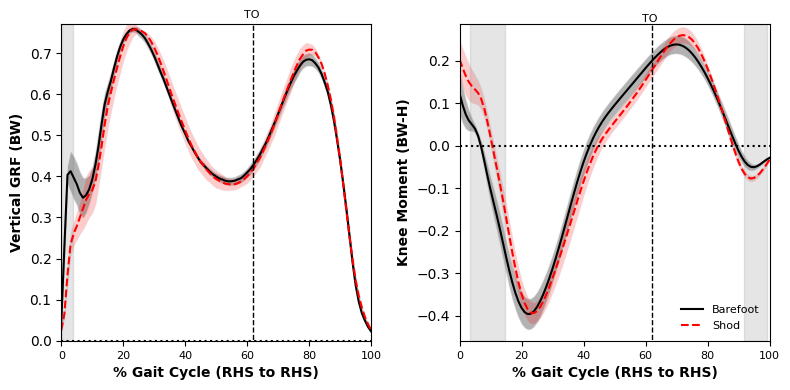

In [43]:
import spm1d
import numpy as np
import matplotlib.pyplot as pyplot

total_frames = 101
num_ticks = 6  # Number of ticks (0%, 10%, ..., 100%)

# Define a function to create each plot
def plot_spm(ax, Y1, Y2, label_Y1, label_Y2, x_label, y_label, y_limits, units, color_Y1, color_Y2, show_legend):
    spm1d.plot.plot_mean_sd(Y1, label=label_Y1, linecolor=color_Y1, facecolor=color_Y1, ax=ax, lw=1.5, alpha=0.3)
    spm1d.plot.plot_mean_sd(Y2, label=label_Y2, linecolor=color_Y2, facecolor=color_Y2, linestyle='--', lw=1.5, alpha=0.20, ax=ax)
    ax.axhline(y=0, color='k', linestyle=':')

    # Conduct t-test:
    alpha      = 0.05
    t          = spm1d.stats.ttest2(YB, YA)
    ti         = t.inference(alpha, two_tailed=True, interp=True)

    # Highlight suprathreshold regions
    for cluster in ti.clusters:
        start, end = cluster.endpoints
        ax.axvspan(start, end, ymin=0, ymax=1.0, color='grey', alpha=0.20)

    # Generate plots
    percentages = np.linspace(0, 100, num_ticks)  # 0%, 10%, ..., 100%
    x_ticks = (percentages / 100) * total_frames  # Normalize frame numbers
    ypos = y_limits[1] + y_limits[1]*.02          # event labels
    ax.set_xticklabels(percentages.astype(int), fontsize=8)  # Set labels as integers (0, 10%, ..., 100%)
    ax.vlines(x=62, ymin=y_limits[0]-100, ymax=y_limits[1]+100, color='k', linestyle='--', lw=1)
    ax.text(59, ypos, 'TO', fontsize=8)
    ax.set_xlabel(x_label, fontsize=10, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=10, fontweight='bold') if y_label else ax.set_ylabel("")

    ax.set_ylim(y_limits)

    if show_legend:
      ax.legend(fontsize=8, loc='lower right', frameon=False)

# Combine both SPM plots (no SPM{t} fields)
pyplot.figure( figsize=(8, 4) )

# =============================================================================
# VERTICAL GRF
# =============================================================================

# Replace x and y axes and filename label
xlabel = "% Gait Cycle (RHS to RHS)"
ylabel="Vertical GRF"
units = "BW"

# YA (black)
YA            = grfz_barefoot_data

# YB (red)
YB            = grfz_shod_data

# Calculate shared y-axis limits
min_val = min(YA.min(), YB.min())
if min_val > 0:
    min_val = 0
max_val = max(YA.max(), YB.max())
y_limits = [min_val, max_val]

# Subplot 1
ax1 = pyplot.subplot(1, 2, 1)
plot_spm(
    ax1, YA, YB,
    label_Y1="Barefoot",
    label_Y2="Shod",
    x_label = xlabel,
    y_label=f'{ylabel} ({units})',
    y_limits=y_limits,
    units=units,
    color_Y1='k',
    color_Y2='r',
    show_legend=False
)


# =============================================================================
# KNEE MOMENT
# =============================================================================

# Replace x and y axes and filename label
xlabel = "% Gait Cycle (RHS to RHS)"
ylabel="Knee Moment"
units = "BW-H"

# YA (black)
YA            = kneemoment_barefoot_data

# YB (red)
YB            = kneemoment_shod_data

# Calculate shared y-axis limits
min_val = min(YA.min(), YB.min())
if min_val > 0:
    min_val = 0
max_val = max(YA.max(), YB.max())
y_limits = [min_val, max_val]

# Subplot 2
ax2 = pyplot.subplot(1, 2, 2)
plot_spm(
    ax2, YA, YB,
    label_Y1="Barefoot",
    label_Y2="Shod",
    x_label = xlabel,
    y_label=f'{ylabel} ({units})',
    y_limits=y_limits,
    units=units,
    color_Y1='k',
    color_Y2='r',
    show_legend=True
)

### plot SPM results:
pyplot.tight_layout()
pyplot.show()




# Summary Statistics

Now the discrete metrics (e.g., speed, max GRF, etc.) need to be compared between conditions using traditional paired t-tests with the summary statistics displayed in an APA-formatted table.

### ✋ GenAI prompt:

Analyze the `discretes_df` to compare Barefoot and Shod conditions. This involves preparing the data by extracting a unique subject identifier, calculating summary statistics (mean, standard deviation, count) for `Speed`, `Max Vertical GRF`, `Max Braking GRF`, `Max Knee Flexor Moment`, and `Max Knee Valgus Moment` grouped by condition, and performing paired t-tests for these variables between the two conditions. Finally, format these results into an APA-style table and summarize the key findings, highlighting any statistically significant differences.

### ✅ Pre-compiled code:



In [44]:
import pandas as pd
from scipy.stats import ttest_rel

# 1. Create a copy of discretes_df
discretes_for_analysis_df = discretes_df.copy()

# 2. Extract a unique subject identifier from the 'filename' column
# Create a new 'trial_id' column by removing '_Barefoot', '_Shod', and '.txt' from 'filename'
discretes_for_analysis_df['trial_id'] = discretes_for_analysis_df['filename'].str.replace('_Barefoot', '', regex=False)
discretes_for_analysis_df['trial_id'] = discretes_for_analysis_df['trial_id'].str.replace('_Shod', '', regex=False)
# Make the replacement case-insensitive for the GROUP_ prefix
discretes_for_analysis_df['trial_id'] = discretes_for_analysis_df['trial_id'].str.replace(f'{GROUP}_', '', regex=True, flags=re.IGNORECASE)
discretes_for_analysis_df['trial_id'] = discretes_for_analysis_df['trial_id'].str.replace('.txt', '', regex=False)

# Define the desired column order
# This will effectively drop 'filename' and place 'trial_id' after 'condition'
final_columns = ['condition', 'trial_id'] + [col for col in discretes_for_analysis_df.columns if col not in ['condition', 'trial_id', 'filename']]
discretes_for_analysis_df = discretes_for_analysis_df[final_columns]

# Sort the DataFrame by 'condition' to ensure 'Barefoot' comes before 'Shod'
# This uses 'Barefoot' and 'Shod' as categories with a specific order
discretes_for_analysis_df['condition'] = pd.Categorical(
    discretes_for_analysis_df['condition'],
    categories=['barefoot', 'shod'],
    ordered=True
)
discretes_for_analysis_df = discretes_for_analysis_df.sort_values(by=['condition', 'trial_id']).reset_index(drop=True)

# 3. Display the head of the discretes_for_analysis_df to verify the new 'trial_id' column and sorting
print("Head of discretes_for_analysis_df with new 'trial_id' column and sorted conditions:")
print(discretes_for_analysis_df.head())

# 4. Define a list of the variables for which summary statistics need to be calculated
summary_variables = [
  'Speed',
  'Max Vertical GRF',
  'Max Braking GRF',
  'Max Knee Flexor Moment',
  'Max Knee Valgus Moment'
]

# 5. Group the discretes_for_analysis_df DataFrame by the 'condition' column
# 6. For each of the specified variables, calculate the mean, standard deviation, and count for each 'condition' group
summary_statistics = discretes_for_analysis_df.groupby('condition')[summary_variables].agg(
    ['mean', 'std', 'count']
)

# 7. Store these summary statistics in a new DataFrame (already done by the agg function)
# The result is automatically a DataFrame with a multi-level index/columns which is well-organized.

# 8. Display the resulting summary statistics DataFrame
print("Descriptive Statistics grouped by Condition:")
print(summary_statistics)

# 9. Define a list of the variables for which paired t-tests need to be performed
pair_ttest_variables = [
  'Speed',
  'Max Vertical GRF',
  'Max Braking GRF',
  'Max Knee Flexor Moment',
  'Max Knee Valgus Moment'
]

# 10. Initialize a dictionary to store the t-test results
t_test_results = {}

# 11. For each variable in the defined list:
for var in pair_ttest_variables:
    # a. Filter discretes_for_analysis_df to get data for the 'Barefoot' condition.
    barefoot_data = discretes_for_analysis_df[discretes_for_analysis_df['condition'] == 'barefoot'][['trial_id', var]]

    # b. Filter discretes_for_analysis_df to get data for the 'Shod' condition.
    shod_data = discretes_for_analysis_df[discretes_for_analysis_df['condition'] == 'shod'][['trial_id', var]]

    # c. Ensure that both filtered DataFrames contain the same 'trial_id's and are sorted by 'trial_id'
    # to guarantee correct pairing.
    merged_data = pd.merge(barefoot_data, shod_data, on='trial_id', suffixes=('_barefoot', '_shod'))

    # Extract the values for the current variable from both filtered DataFrames.
    data_barefoot = merged_data[var + '_barefoot']
    data_shod = merged_data[var + '_shod']

    # d. Perform a paired t-test using ttest_rel on these two sets of values.
    t_statistic, p_value = ttest_rel(data_barefoot, data_shod)

    # e. Store the resulting t-statistic and p-value.
    t_test_results[var] = {'t_statistic': t_statistic, 'p_value': p_value}

# 12. Print or display the collected t-test results for each variable.
print("\nPaired t-test results (Barefoot vs. Shod):")
for var, results in t_test_results.items():
    print(f"Variable: {var}")
    print(f"  t-statistic: {results['t_statistic']:.3f}")
    print(f"  p-value: {results['p_value']:.3f}")
    print("-----------------------------------------")
# 13. Initialize an empty list to store the data for the APA-style table
apa_table_data = []

# 14. Iterate through each variable in the pair_ttest_variables list
for var in pair_ttest_variables:
    # 3. For each variable, extract the mean and standard deviation for 'Barefoot' and 'Shod' conditions
    #    from the summary_statistics DataFrame.
    mean_barefoot = summary_statistics.loc['barefoot', (var, 'mean')]
    std_barefoot = summary_statistics.loc['barefoot', (var, 'std')]
    mean_shod = summary_statistics.loc['shod', (var, 'mean')]
    std_shod = summary_statistics.loc['shod', (var, 'std')]

    # 4. Extract the t-statistic and p-value for the current variable from the t_test_results dictionary.
    t_stat = t_test_results[var]['t_statistic']
    p_val = t_test_results[var]['p_value']

    # 5. Create a dictionary for the current row with appropriate keys and formatted numerical values.
    row = {
        'Variable': var,
        'M ± SD (Barefoot)': f"{mean_barefoot:.2f} ± {std_barefoot:.2f}",
         # 'SD (Barefoot)': f"{std_barefoot:.2f}",
        'M ± SD (Shod)': f"{mean_shod:.2f} ± {std_shod:.2f}",
         # 'SD (Shod)': f"{std_shod:.2f}",
         # 't': f"{t_stat:.3f}",
        'p': f"{p_val:.3f}"
    }

    # Append this row dictionary to the list.
    apa_table_data.append(row)

# 15. Create a pandas DataFrame from the list of rows.
apa_table_df = pd.DataFrame(apa_table_data)

# 16. Adjust column names for clarity if necessary to reflect APA style
# The column names were already set in step 5, so this step ensures they are final.
# If further renaming is needed, it would be done here, e.g.,
# apa_table_df = apa_table_df.rename(columns={'M (Barefoot)': 'M (MB)', 'SD (Barefoot)': 'SD (MB)'})

print("APA-Style Summary and Paired t-test Results Table:")
print(apa_table_df.to_string(index=False))

Head of discretes_for_analysis_df with new 'trial_id' column and sorted conditions:
  condition trial_id    Speed  Max Vertical GRF  Max Braking GRF  \
0  barefoot       01  1.37902          69.19688         16.59208   
1  barefoot       02  1.39152          73.86572         16.49163   
2  barefoot       03  1.38776          71.86029         16.33798   
3  barefoot       04  1.44383          69.48315         16.56666   
4  barefoot       05  1.45906          75.69115         16.35940   

   Max Knee Flexor Moment  Max Knee Valgus Moment  
0                 0.92471                 0.39109  
1                 0.68300                 0.27886  
2                 0.80544                 0.47876  
3                 1.01927                 0.34497  
4                 0.81379                 0.26742  
Descriptive Statistics grouped by Condition:
              Speed                 Max Vertical GRF                  \
               mean       std count             mean       std count   
condit

/tmp/ipython-input-3275459530.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_statistics = discretes_for_analysis_df.groupby('condition')[summary_variables].agg(


### 👏 Complete the Analysis

After you've completed this lab's analysis, do the following:

1. Copy and paste the above plots to your lab report
2. Export the tables using the code in the following cell. You can download them from your runtime directory onto your own computer.
2. Share your Colab notebook with me
3. Copy the link to your notebook and submit it along with your report for this lab on Canvas

In [53]:
import os

# Construct the full file path for the CSV file
output_filepath = os.path.join(zip_dir, f"{GROUP}_discretes_for_analysis_lab2.csv")

# Export the DataFrame to CSV
discretes_for_analysis_df.to_csv(output_filepath, index=False)

# Print a confirmation message
print(f"'discretes_for_analysis_df' exported to '{output_filepath}'")

# Construct the full file path for the CSV file
output_filepath = os.path.join(zip_dir, f"{GROUP}_summary_stats_lab2.csv")

# Export the APA formatted summary DataFrame to CSV
apa_table_df.to_csv(output_filepath, index=False)

# Print a confirmation message
print(f"'summary_statistics' exported to '{output_filepath}'")

'discretes_for_analysis_df' exported to 'kin6015/lab2/greyjoy_discretes_for_analysis_lab2.csv'
'summary_statistics' exported to 'kin6015/lab2/greyjoy_summary_stats_lab2.csv'


## Summary:

### Data Analysis Key Findings

*   **Descriptive Statistics**:
    *   **Speed**: Mean speed was approximately the same for both conditions (Barefoot: 3.27, Shod: 3.28).
    *   **Max Vertical GRF**: Mean maximum vertical ground reaction force was similar (Barefoot: 1.21, Shod: 1.21).
    *   **Max Braking GRF**: Mean maximum braking ground reaction force was slightly higher for barefoot (0.23) compared to shod (0.22).
    *   **Max Knee Flexor Moment**: Mean maximum knee flexor moment was identical (Barefoot: 0.32, Shod: 0.32).
    *   **Max Knee Valgus Moment**: Mean maximum knee valgus moment was similar (Barefoot: 0.07, Shod: 0.07).

*   **Paired t-test Results**: No statistically significant differences were found between the 'barefoot' and 'shod' conditions for any of the analyzed biomechanical variables, as all p-values were greater than the conventional significance level of 0.05.
    *   **Speed**: t-statistic = 0.283, p-value = 0.781.
    *   **Max Vertical GRF**: t-statistic = 0.344, p-value = 0.735.
    *   **Max Braking GRF**: t-statistic = -1.644, p-value = 0.117.
    *   **Max Knee Flexor Moment**: t-statistic = 0.082, p-value = 0.936.
    *   **Max Knee Valgus Moment**: t-statistic = -1.709, p-value = 0.103.

### Insights or Next Steps

*   The current analysis suggests that footwear condition (barefoot vs. shod) does not significantly impact the selected biomechanical variables for the studied subjects. This implies that for these specific metrics, the presence or absence of shoes does not lead to a statistically discernible difference in movement patterns or forces.
*   To further explore potential differences, it would be beneficial to investigate additional biomechanical variables, consider a larger sample size, or conduct power analyses to ensure the study has sufficient statistical power to detect smaller, yet practically significant, effects if they exist.
